# Weekday VS BeginTime

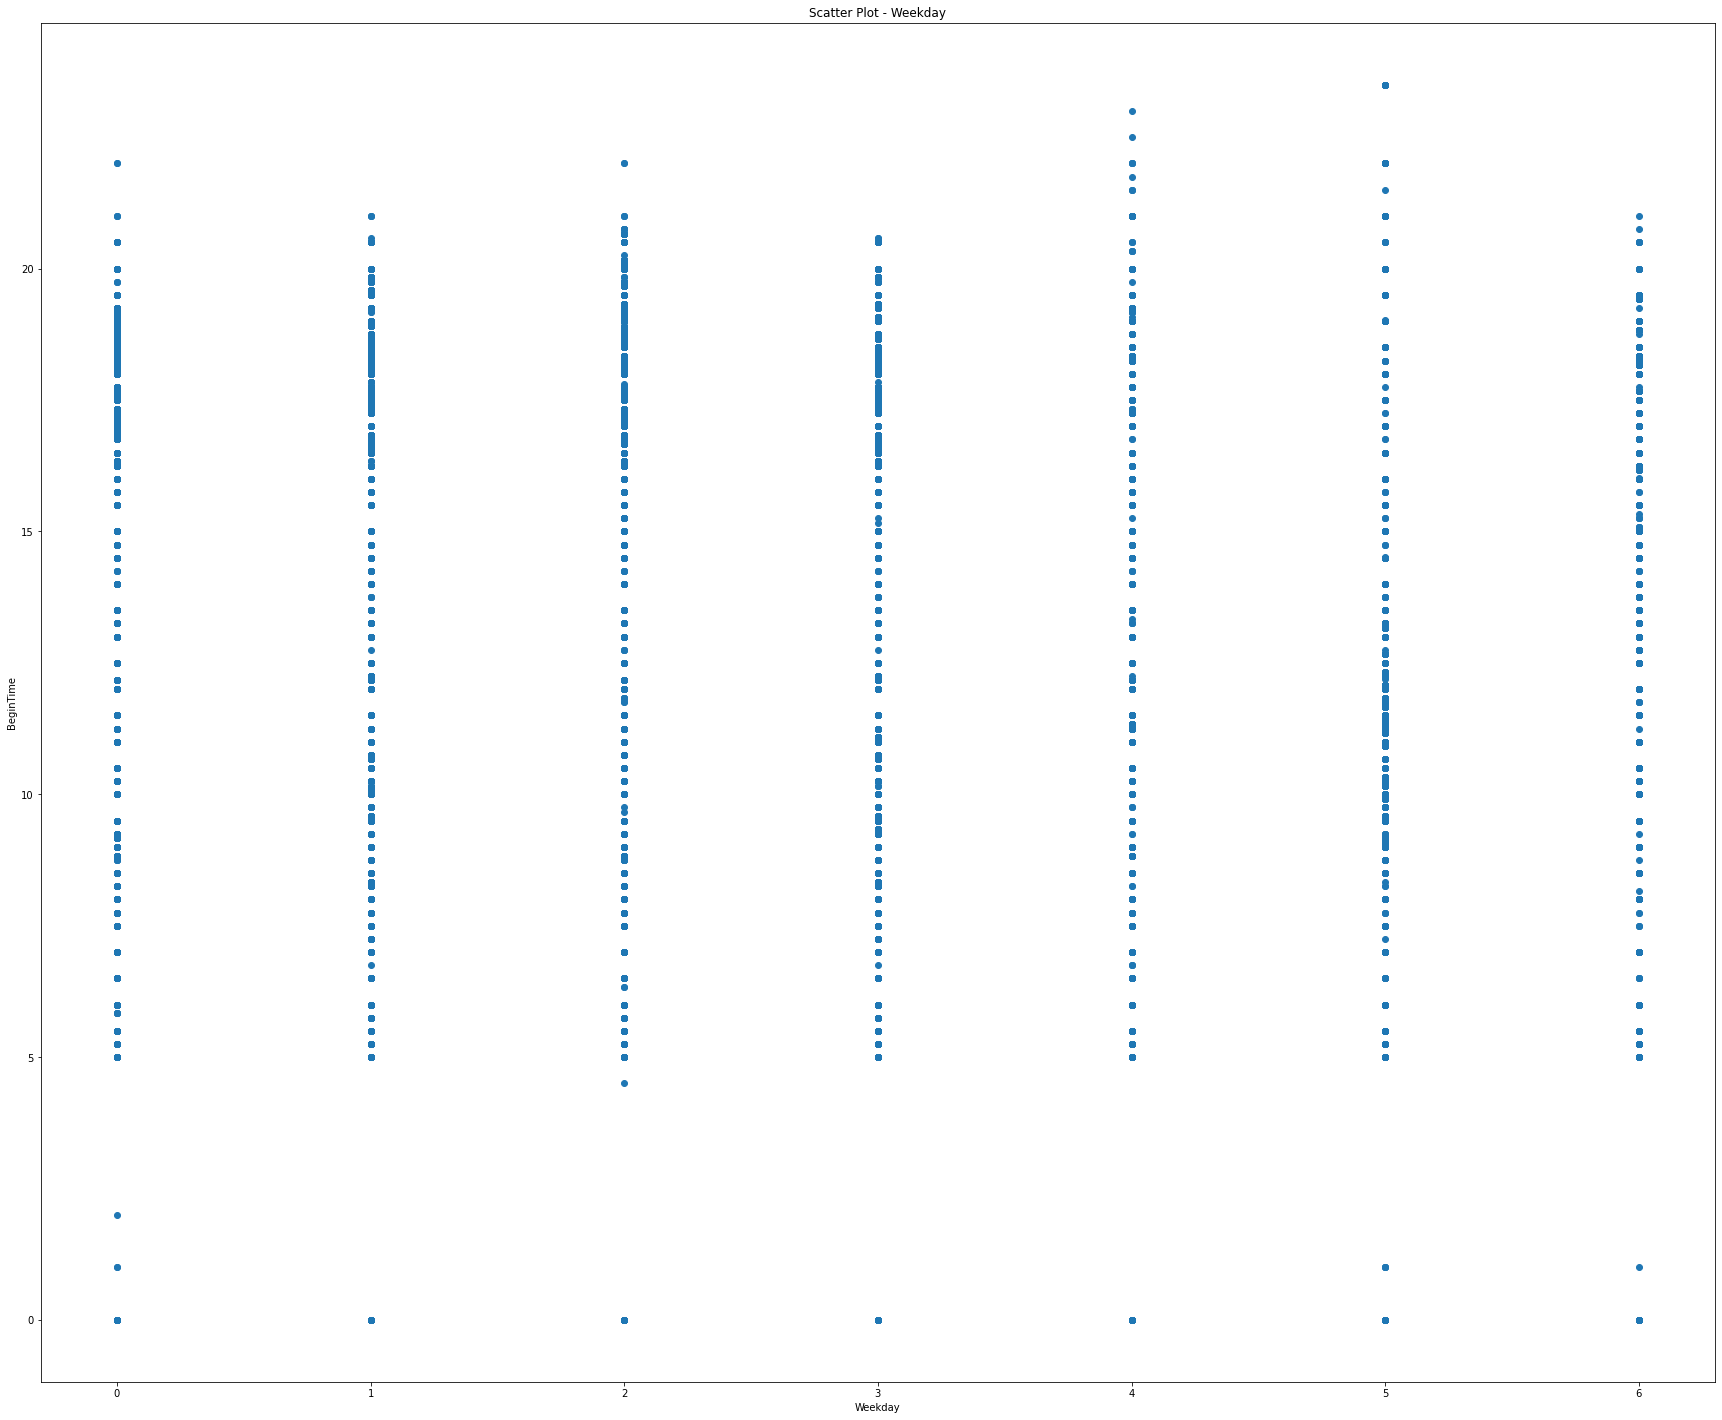

In [3]:
#Scatter-Plot
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
# read in the CSV file as a pandas DataFrame
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

plt.figure(figsize=(30, 25))
plt.scatter(data['Weekday'], data['BeginTime'])
plt.xlabel('Weekday')
plt.ylabel('BeginTime')
plt.title('Scatter Plot - Weekday')
plt.show()

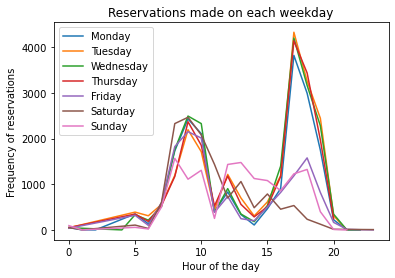

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# parse the BeginTimeDate column to create separate columns for date and time
data['BeginTimeDate'] = pd.to_datetime(data['BeginTimeDate'])
data['date'] = data['BeginTimeDate'].dt.date
data['hour'] = data['BeginTimeDate'].dt.hour

# group the data by weekday and hour, and count the number of reservations for each hour
hourly_counts = data.groupby(['Weekday', 'hour']).size().reset_index(name='count')

# create separate dataframes for each weekday
monday_data = hourly_counts[hourly_counts['Weekday'] == 0]
tuesday_data = hourly_counts[hourly_counts['Weekday'] == 1]
wednesday_data = hourly_counts[hourly_counts['Weekday'] == 2]
thursday_data = hourly_counts[hourly_counts['Weekday'] == 3]
friday_data = hourly_counts[hourly_counts['Weekday'] == 4]
saturday_data = hourly_counts[hourly_counts['Weekday'] == 5]
sunday_data = hourly_counts[hourly_counts['Weekday'] == 6]

# plot the data for each weekday
plt.plot(monday_data['hour'], monday_data['count'], label='Monday')
plt.plot(tuesday_data['hour'], tuesday_data['count'], label='Tuesday')
plt.plot(wednesday_data['hour'], wednesday_data['count'], label='Wednesday')
plt.plot(thursday_data['hour'], thursday_data['count'], label='Thursday')
plt.plot(friday_data['hour'], friday_data['count'], label='Friday')
plt.plot(saturday_data['hour'], saturday_data['count'], label='Saturday')
plt.plot(sunday_data['hour'], sunday_data['count'], label='Sunday')

# add a title, x-label, and y-label
plt.title('Reservations made on each weekday')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of reservations')

# add a legend
plt.legend()

# show the plot
plt.savefig("/Users/rschm/Downloads/ReservationHourByWeekday.pdf")
plt.show()




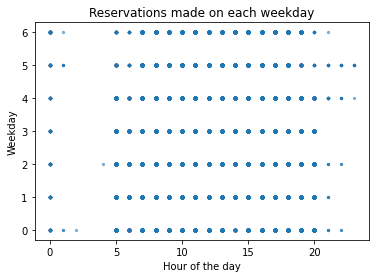

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# parse the BeginTimeDate column to create separate columns for date and time
data['BeginTimeDate'] = pd.to_datetime(data['BeginTimeDate'])
data['Weekday'] = data['BeginTimeDate'].dt.weekday
data['hour'] = data['BeginTimeDate'].dt.hour

# plot the scatter plot
plt.scatter(data['hour'], data['Weekday'], s=5, alpha=0.5)

# add a title, x-label, and y-label
plt.title('Reservations made on each weekday')
plt.xlabel('Hour of the day')
plt.ylabel('Weekday')

# show the plot
plt.show()


Trying to use scikit-learn for a regression model

In [21]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# read in the csv file
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# preprocess the data
data['Weekday'] = data['Weekday'].astype(int)
data['BeginTime'] = pd.to_datetime(data['BeginTime']).dt.hour

# select relevant features for regression
features = ['Weekday', 'BeginTime']

# create a new dataframe with only the selected features
X = data[features]

# select the target variable for prediction
y = data['Duration Minutes']

# create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# use the model to make predictions on new data
data_weekday = pd.DataFrame({'Weekday': [0, 1, 2, 3, 4, 5, 6], 'BeginTime': [4, 5, 6, 7, 8, 9, 10]})
predictions_weekday = model.predict(data_weekday)

# print the predicted durations for the new data
print(predictions_weekday)


[100.73592601 115.40698141 130.07803681 144.74909222 159.42014762
 174.09120302 188.76225842]


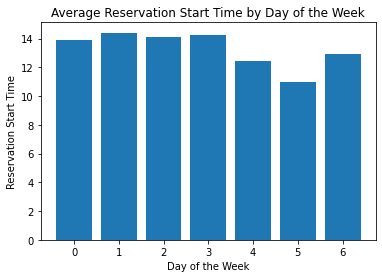

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/Users/rschm/DateTimeCleanedReservationsAll.csv')

# Compute the mean duration by day of the week
mean_duration = df.groupby('Weekday')['BeginTime'].mean()

# Create a bar graph of the mean duration by day of the week
plt.bar(mean_duration.index, mean_duration)

# Set the title and axis labels
plt.title('Average Reservation Start Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Reservation Start Time')

# Show the plot
plt.savefig("/Users/rschm/Downloads/ReservationStartTimeByWeekday.pdf", format="pdf", bbox_inches="tight")
plt.show()


# Weekday VS DurationMinutes

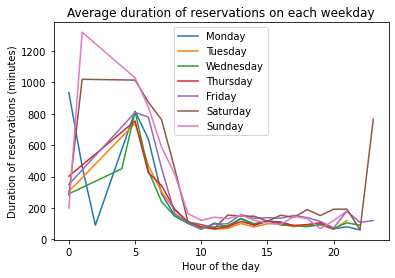

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# read in the csv file
data = pd.read_csv('/Users/rschm/Downloads/DateTimeCleanedReservationsAll.csv')

# parse the BeginTimeDate column to create separate columns for date and time
data['BeginTimeDate'] = pd.to_datetime(data['BeginTimeDate'])
data['date'] = data['BeginTimeDate'].dt.date
data['hour'] = data['BeginTimeDate'].dt.hour

# group the data by weekday and hour, and calculate the mean duration of reservations for each hour
hourly_duration = data.groupby(['Weekday', 'hour'])['Duration Minutes'].mean().reset_index(name='duration')

# create separate dataframes for each weekday
monday_data = hourly_duration[hourly_duration['Weekday'] == 0]
tuesday_data = hourly_duration[hourly_duration['Weekday'] == 1]
wednesday_data = hourly_duration[hourly_duration['Weekday'] == 2]
thursday_data = hourly_duration[hourly_duration['Weekday'] == 3]
friday_data = hourly_duration[hourly_duration['Weekday'] == 4]
saturday_data = hourly_duration[hourly_duration['Weekday'] == 5]
sunday_data = hourly_duration[hourly_duration['Weekday'] == 6]

# plot the data for each weekday
plt.plot(monday_data['hour'], monday_data['duration'], label='Monday')
plt.plot(tuesday_data['hour'], tuesday_data['duration'], label='Tuesday')
plt.plot(wednesday_data['hour'], wednesday_data['duration'], label='Wednesday')
plt.plot(thursday_data['hour'], thursday_data['duration'], label='Thursday')
plt.plot(friday_data['hour'], friday_data['duration'], label='Friday')
plt.plot(saturday_data['hour'], saturday_data['duration'], label='Saturday')
plt.plot(sunday_data['hour'], sunday_data['duration'], label='Sunday')

# add a title, x-label, and y-label
plt.title('Average duration of reservations on each weekday')
plt.xlabel('Hour of the day')
plt.ylabel('Duration of reservations (minutes)')

# add a legend
plt.legend()

# show the plot
plt.show()


Above graph needs more work

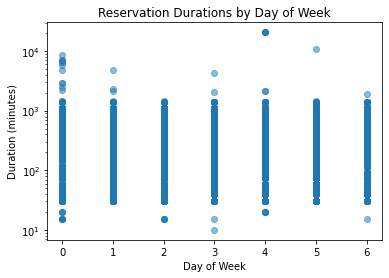

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/Users/rschm/DateTimeCleanedReservationsAll.csv')

# Create a scatter plot of reservation durations by day of the week
plt.scatter(df['Weekday'], df['Duration Minutes'], alpha=0.5)

# Set the title and axis labels
plt.title('Reservation Durations by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Duration (minutes)')

plt.yscale('log')

# Show the plot
plt.savefig("/Users/rschm/Downloads/ReservationDurationWeekdayScatterPlot.pdf", format="pdf", bbox_inches="tight")
plt.show()

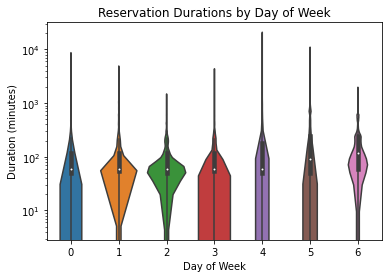

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/Users/rschm/DateTimeCleanedReservationsAll.csv')

# Create a violin plot of reservation durations by day of the week
sns.violinplot(x='Weekday', y='Duration Minutes', data=df)

# Set the title and axis labels
plt.title('Reservation Durations by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Duration (minutes)')

plt.yscale('log')

# Show the plot
plt.savefig("/Users/rschm/Downloads/ReservationDurationWeekdayViolin.pdf", format="pdf", bbox_inches="tight")
plt.show()


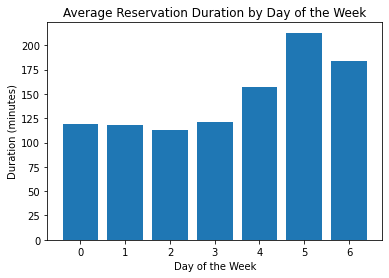

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/Users/rschm/DateTimeCleanedReservationsAll.csv')

# Compute the mean duration by day of the week
mean_duration = df.groupby('Weekday')['Duration Minutes'].mean()

# Create a bar graph of the mean duration by day of the week
plt.bar(mean_duration.index, mean_duration)

# Set the title and axis labels
plt.title('Average Reservation Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')

# Show the plot
plt.savefig("/Users/rschm/Downloads/ReservationDurationWeekday.pdf", format="pdf", bbox_inches="tight")
plt.show()
